/home/fagg/miniconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We have 2 GPUs



`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[<_io.BufferedReader name='../results/912467'>, <_io.BufferedReader name='../results/256648'>, <_io.BufferedReader name='../results/110923'>, <_io.BufferedReader name='../results/762977'>, <_io.BufferedReader name='../results/470664'>, <_io.BufferedReader name='../results/520921'>, <_io.BufferedReader name='../results/760314'>, <_io.BufferedReader name='../results/168894'>, <_io.BufferedReader name='../results/683461'>, <_io.BufferedReader name='../results/350118'>, <_io.BufferedReader name='../results/971111'>, <_io.BufferedReader name='../results/688652'>, <_io.BufferedReader name='../results/810312'>, <_io.BufferedReader name='../results/007016'>, <_io.BufferedReader name='../results/125228'>, <_io.BufferedReader name='../results/199032'>, <_io.BufferedReader name='../results/352205'>, <_io.BufferedReader name='../results/858066'>, <_io.BufferedReader name='../results/846411'>, <_io.BufferedReader name='../results/220992'>, <_io.BufferedReader name='../results/708697'>, <_io.Buffere

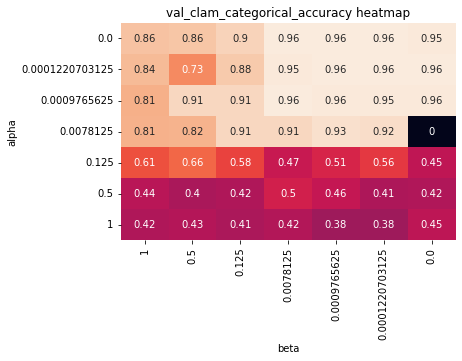

In [1]:
import argparse
import pickle

import numpy as np
from supervised.util import load_most_recent_results_with_fnames as load_most_recent_results
from supervised.evaluations.image_classification import show_mask
from itertools import product
from supervised.util import dict_to_string, prep_gpu

import matplotlib.pyplot as plt
import seaborn as sn

prep_gpu(12, 2, False)

shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'
metric = 'val_clam_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid = np.zeros(tuple(shape))
counts = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])
    try:
        grid[tuple(result_coord)] += results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    except:
        print(fname)
    counts[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts = np.maximum(np.ones_like(counts), counts)
grid /= counts
    
print(dict_to_string(values))

print(np.flip(grid, 1))
print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title(metric + ' heatmap')
plt.show()

[<_io.BufferedReader name='../results/912467'>, <_io.BufferedReader name='../results/256648'>, <_io.BufferedReader name='../results/110923'>, <_io.BufferedReader name='../results/762977'>, <_io.BufferedReader name='../results/470664'>, <_io.BufferedReader name='../results/520921'>, <_io.BufferedReader name='../results/760314'>, <_io.BufferedReader name='../results/168894'>, <_io.BufferedReader name='../results/683461'>, <_io.BufferedReader name='../results/350118'>, <_io.BufferedReader name='../results/971111'>, <_io.BufferedReader name='../results/688652'>, <_io.BufferedReader name='../results/810312'>, <_io.BufferedReader name='../results/007016'>, <_io.BufferedReader name='../results/125228'>, <_io.BufferedReader name='../results/199032'>, <_io.BufferedReader name='../results/352205'>, <_io.BufferedReader name='../results/858066'>, <_io.BufferedReader name='../results/846411'>, <_io.BufferedReader name='../results/220992'>, <_io.BufferedReader name='../results/708697'>, <_io.Buffere

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


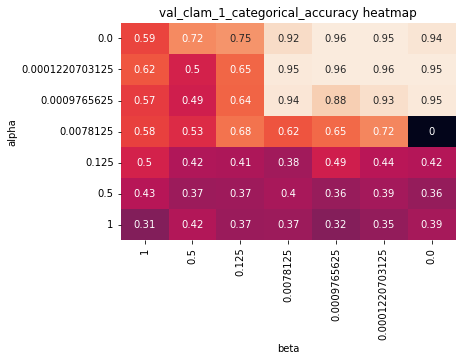

In [2]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'
metric2 = 'val_clam_1_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid2 = np.zeros(tuple(shape))
counts2 = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    grid2[tuple(result_coord)] += results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    counts2[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts2 = np.maximum(np.ones_like(counts2), counts2)
grid2 /= counts2
    
print(dict_to_string(values))

print(np.flip(grid2, 1))
print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title(metric2 + ' heatmap')
plt.show()

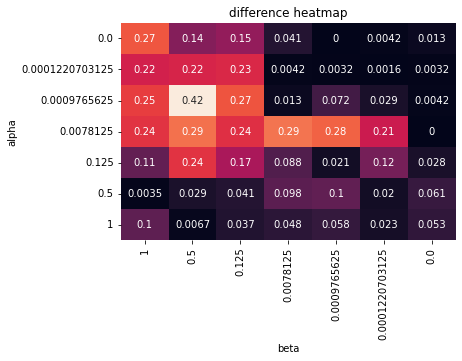

[['424978' '851918' '947169' '806269' '096786' '075284' '688652']
 ['387656' '236109' '230073' '491709' '446034' '007016' '302605']
 ['065342' '520921' '928679' '336814' '270075' '071698' '631077']
 ['717652' '265134' '224008' '041674' '783911' '416678' '0.0']
 ['408323' '782908' '872666' '317143' '002667' '019787' '139903']
 ['977744' '279644' '918699' '213233' '047866' '343132' '012639']
 ['075672' '121584' '868996' '864957' '682741' '946412' '507206']]


In [3]:
sn.heatmap(np.flip(grid - grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()
print(np.flip(fnames_grid, 1))

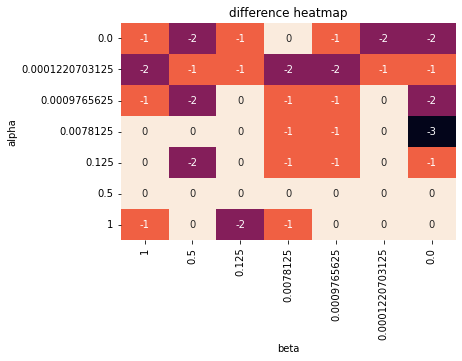

[(0.0078125, 0.0, 3.0), (0.0, 0.0, 2.0), (0.0, 0.0001220703125, 2.0), (0.0, 0.5, 2.0), (0.0001220703125, 0.0009765625, 2.0), (0.0001220703125, 0.0078125, 2.0), (0.0001220703125, 1, 2.0), (0.0009765625, 0.0, 2.0), (0.0009765625, 0.5, 2.0), (0.125, 0.5, 2.0), (1, 0.125, 2.0), (0.0, 0.0009765625, 1.0), (0.0, 0.125, 1.0), (0.0, 1, 1.0), (0.0001220703125, 0.0, 1.0), (0.0001220703125, 0.0001220703125, 1.0), (0.0001220703125, 0.125, 1.0), (0.0001220703125, 0.5, 1.0), (0.0009765625, 0.0009765625, 1.0), (0.0009765625, 0.0078125, 1.0), (0.0009765625, 1, 1.0), (0.0078125, 0.0009765625, 1.0), (0.0078125, 0.0078125, 1.0), (0.125, 0.0, 1.0), (0.125, 0.0009765625, 1.0), (0.125, 0.0078125, 1.0), (1, 0.0078125, 1.0), (1, 1, 1.0)]
28


In [24]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'

count = np.zeros(tuple(shape))

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    
    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    count[tuple(result_coord)] += 1

threes = np.ones_like(count) * 3
remaining = np.minimum(count - threes, np.zeros_like(count))

sn.heatmap(np.flip(remaining, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()

indicies_unfinished = [i for i in zip(*[j for j in remaining.nonzero()])]

alpha_beta_reps = [(values['alpha'][i], values['beta'][j], -1*remaining[i, j]) for i, j in indicies_unfinished]

print(sorted(alpha_beta_reps, key=lambda k: k[-1], reverse=True))
print(len(alpha_beta_reps))



------------------------------------------------------------
Experimental Results Summary (Index: 32)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function dot_dataset at 0x2addccb89ea0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 32
	prefetch: 4
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2ae2026d7eb0>
	network_args: {
		hyperband: False
		l1: None
		learning_rate: 0.0005
		conv_size: [3]
		n_classes: 3
		iterations: 6
		conv_filters: [12]
		lrate: 0.0005
		dense_layers: [32, 16]
		alpha: 0.0009765625
		depth: 5
		image_size: (128, 128, 3)
		l2: None
		beta: 0.0009765625
		noise_level: 0.005
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 32
	min_delta: 0.0
	epochs: 256
	nogo: False
	}

Experim


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2023-01-10 13:50:37.605903: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-10 13:50:38.842072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38259 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2023-01-10 13:50:38.847150: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/

(None, 128, 128, 4)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)


2023-01-10 13:50:47.708692: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2023-01-10 13:50:48.760829: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-10 13:50:48.850194: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-01-10 13:50:48.894589: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(None, 128, 128, 4)
(3, 1)


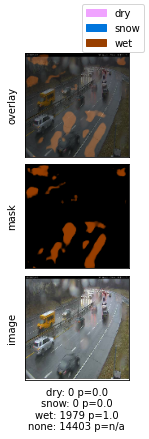

(3, 1)


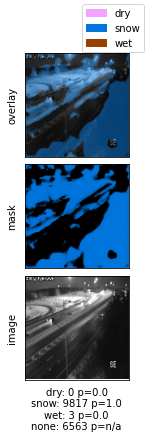

(3, 1)


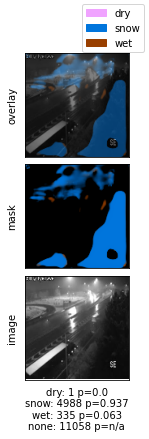

(3, 1)


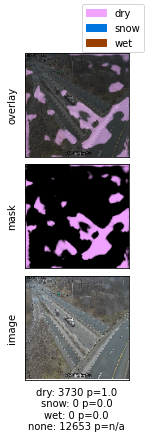

(3, 1)


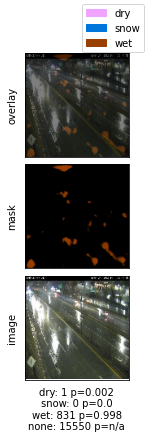

(3, 1)


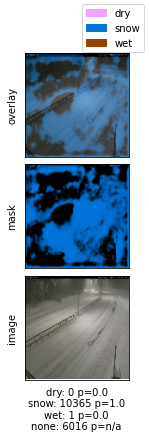

(3, 1)


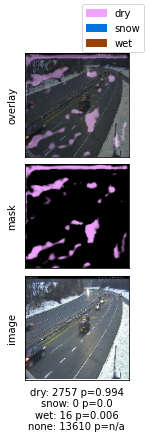

(3, 1)


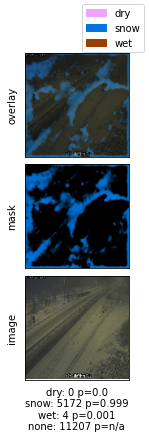

(3, 1)


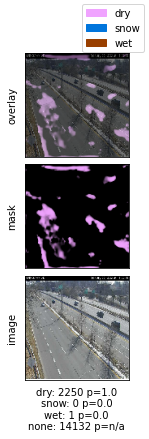

(3, 1)


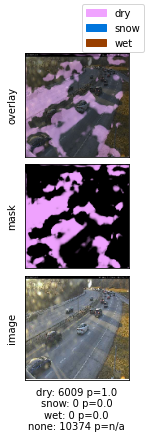

(3, 1)


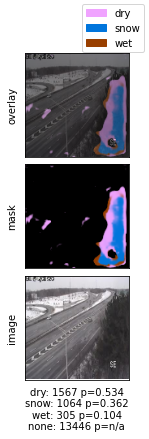

(3, 1)


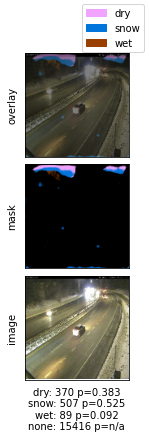

(3, 1)


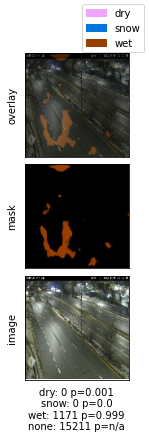

(3, 1)


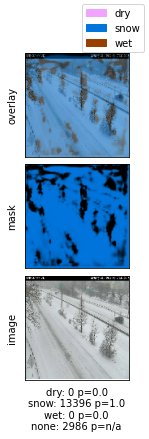

(3, 1)


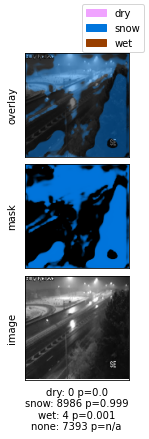

(3, 1)


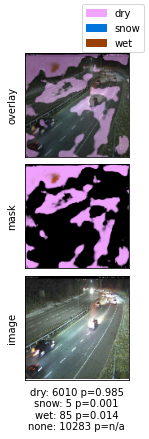

In [5]:
with open('../results/' + np.flip(fnames_grid, 1).flatten()[np.argmax(np.flip((grid - grid2), 1))], 'rb') as fp:
    results = pickle.load(fp)
    
with open('../results/846919', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['val']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

show_mask(test_dset, 16, model_data, class_names=class_names)

In [1]:
# next, find the predictions that are correct and incorrect